# Лекция 11. Matplotlib_2

        
3. Виды графиков

    3.1. Диаграмма рассеяния - `scatter`
    
        3.1.1. Цветовая шкала
    
    3.2. Гистограмма - `hist`
    
    
4. Визуализация матриц и изображений

    4.1. `spy`
    
    4.2. `imshow`
    
    4.3. `pcolor`
    
    
5. Построение контурных карт

    5.1. `contour`, `contourf`
    
    5.2. `tricontour`, `tricontourf`
   
   
6. Элементы рисунка

    6.1. Рисунок `figure`, оси `axes`
    
        6.1.1. Несколько графиков на одном рисунке `subplots`
    
    6.2. Засечки `ticks`
    
    6.3. Сетка `grid`
    
    
7. Сохранение рисунка `savefig`

In [1]:
import numpy as np
import matplotlib.pyplot as plt

C:\Users\stasb\Anaconda3\envs\p38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\stasb\Anaconda3\envs\p38\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
C:\Users\stasb\Anaconda3\envs\p38\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\stasb\Anaconda3\envs\p38\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## `scatter`

Рисует набор точек с возможностью задать для каждой свой цвет и размер

Синтаксис вызова:

`plt.scatter(x, y, c, s, cmap='viridis', ...)`

`x, y` - координаты точек

`с` - массив чисел, которые будут преобразованы в цвета при помощи цветовой карты `colormap`.

Цветовой картой можно управлять параметром `cmap`: [Matplotlib colormaps](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)

`s` - массив чисел, задающих размер точки (площадь маркера)

In [2]:
rng = np.random.default_rng()

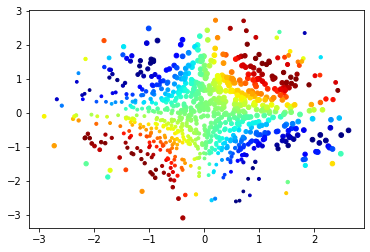

In [3]:
x = rng.normal(size=(30, 30))
y = rng.normal(size=(30, 30))
s = 15*(1+0.5*np.sin(x+y))
c = np.sin(x*y)
plt.scatter(x, y, c=c, s=s, cmap='jet')

## `colorbar`

Позволяет отобразить шкалу соответствия цветов и значений какого-либо параметра

Синтаксис вызова:

`plt.colorbar(mappable, ...)`

`mappable` - объект, объединяющий цветовую шкалу и нормализатор; такой объект обычно возвращают функции, рисующие цветные изображения `scatter`, `imshow`, `contourf`, ...


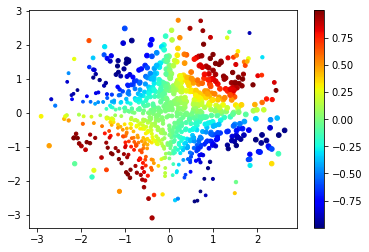

In [4]:
r = plt.scatter(x, y, c=c, s=s, cmap='jet')
plt.colorbar(r)

## Задание

[Датасет](https://www.kaggle.com/dronio/SolarEnergy)

| | | |
|-|-|-|
|0|UNIXTime|int
|1|Date|datetime
|2|Time|datetime
|3|Radiation|float
|4|Temperature|float
|5|Pressure|float
|6|Humidity|float
|7|WindDirection(Degrees)|float
|8|Speed|float
|9|TimeSunRise|datetime
|10|TimeSunSet|datetime

Построить `диаграмму рассеяния`, используя следующие столбцы (x, y, c, s):
-  5, 4, 6, 7
-  3, 4, 5, 6


Отобразить цветовую шкалу.

Загрузить данные можно так:
```
np.loadtxt('SolarPrediction.csv', # имя файла
            skiprows=1,           # пропустить названия столбцов
            delimiter=',',        # разделитель
            usecols=range(3,9))   # какие столбцы загружать
```

In [6]:
np.loadtxt('SolarPrediction.csv', # имя файла
            skiprows=1,           # пропустить названия столбцов
            delimiter=',',        # разделитель
            usecols=range(3,9))   # какие столбцы загружать

array([[  1.21,  48.  ,  30.46,  59.  , 177.39,   5.62],
       [  1.21,  48.  ,  30.46,  58.  , 176.78,   3.37],
       [  1.23,  48.  ,  30.46,  57.  , 158.75,   3.37],
       ...,
       [  1.2 ,  44.  ,  30.42, 102.  , 145.19,   9.  ],
       [  1.23,  44.  ,  30.42, 101.  , 164.19,   7.87],
       [  1.2 ,  44.  ,  30.43, 101.  ,  83.59,   3.37]])

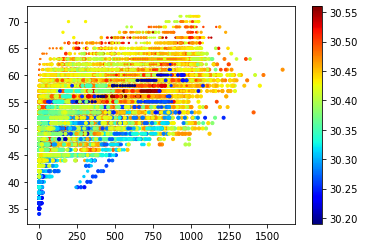

In [11]:
text = np.loadtxt('SolarPrediction.csv',
                  skiprows=1,
                  delimiter=',',
                  usecols=range(3,9))
# 5, 4, 6, 7
# x = text[:,2]
# y = text[:,1]
# c = text[:,3]
# s = text[:,4] * 0.1

# 3, 4, 5, 6
x = text[:,0]
y = text[:,1]
c = text[:,2]
s = text[:,3] * 0.1

r = plt.scatter(x, y, c=c, s=s, cmap='jet')
plt.colorbar(r)

## `hist`

Позволяет посчитать и отобразить гистограмму. Гистограмма - столбчатая диаграмма, иллюстрирующая количество элементов массива `x`, попавших в заданные интервалы. Границы интервалов, как правило, распределены равномерно на `[min(x), max(x)]`.

Синтаксис вызова:

`plt.hist(x, bins, ...)`

`x` - исходный массив

`bins` - количество интервалов


In [12]:
rng = np.random.default_rng()

(array([5071., 4927., 5140., 5039., 4958., 4991., 5057., 4968., 4873.,
        5021., 4979., 5055., 4972., 5162., 4957., 4855., 5060., 4804.,
        5022., 5089.]),
 array([2.26642644e-05, 5.00209013e-02, 1.00019138e-01, 1.50017375e-01,
        2.00015612e-01, 2.50013849e-01, 3.00012087e-01, 3.50010324e-01,
        4.00008561e-01, 4.50006798e-01, 5.00005035e-01, 5.50003272e-01,
        6.00001509e-01, 6.49999746e-01, 6.99997983e-01, 7.49996220e-01,
        7.99994457e-01, 8.49992694e-01, 8.99990931e-01, 9.49989168e-01,
        9.99987405e-01]),
 <BarContainer object of 20 artists>)

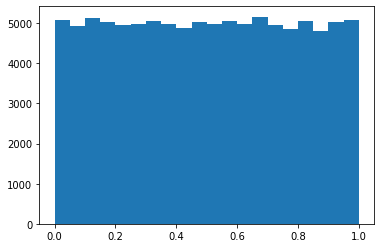

In [13]:
plt.hist(rng.uniform(size=100000), bins=20)

(array([7.000e+00, 1.700e+01, 4.200e+01, 1.120e+02, 2.320e+02, 4.780e+02,
        8.370e+02, 1.174e+03, 1.446e+03, 1.504e+03, 1.408e+03, 1.129e+03,
        7.540e+02, 4.750e+02, 2.420e+02, 8.800e+01, 2.900e+01, 2.000e+01,
        5.000e+00, 1.000e+00]),
 array([-3.63857641, -3.25476133, -2.87094626, -2.48713118, -2.10331611,
        -1.71950103, -1.33568596, -0.95187089, -0.56805581, -0.18424074,
         0.19957434,  0.58338941,  0.96720449,  1.35101956,  1.73483464,
         2.11864971,  2.50246478,  2.88627986,  3.27009493,  3.65391001,
         4.03772508]),
 <BarContainer object of 20 artists>)

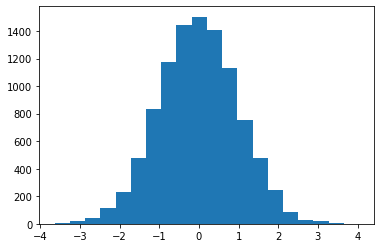

In [14]:
plt.hist(rng.normal(size=10000), bins=20)

## `imshow`

Рисует растровое изображение, заданное двумерной матрицей (значения матрицы преобразуются в цвет при помощи цветовой карты) или трехмерным массивом, третье измерение которого задает интенсивность основных цветов R, G, B, A (канал прозрачности).

Синтаксис вызова:

`plt.imshow(X, cmap, extent, ...)`

`X` - двумерный или трехмерный массив

`cmap` - название цветовой шкалы или ссылка на объект

`extent` - координаты прямоугольника, в который будет вписано изображение


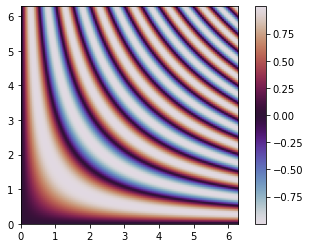

In [17]:
x = np.linspace(0, 2*np.pi, 100)
y = x[:, None]
z = np.sin(x*y)

r = plt.imshow(z, origin='lower', cmap='twilight', extent=[0, 2*np.pi]*2)
plt.colorbar(r)

## `imread`

Загружает изображение из файлов различных форматов и возвращает массив.

Синтаксис вызова:

`plt.imread(path, ...)`

`path` - путь к файлу с изображением или `URL`


In [18]:
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Raptor-test-9-25-2016.jpg/1920px-Raptor-test-9-25-2016.jpg'
img = plt.imread(url, format='jpeg')
img.shape

<ipython-input-18-8550c00adbcd>:2: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``PIL.Image.open(urllib.request.urlopen(url))``.
  img = plt.imread(url, format='jpeg')


(1280, 1920, 3)

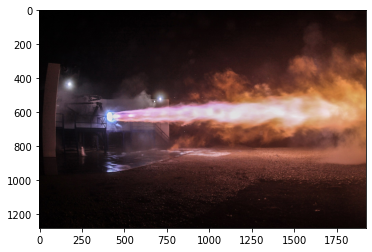

In [19]:
# как видно по форме загруженного массива, 
# высота изображения - 1280, ширина - 1920 и три канала (R, G, B)
plt.imshow(img)

(array([912444., 475758., 228704., 192362., 157418., 123649.,  91697.,
         64269., 191655.,  19644.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

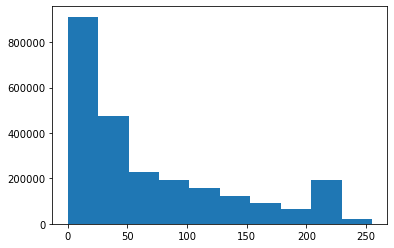

In [12]:
# гистограмма красного канала
plt.hist(img[:,:,0].ravel())

## Задание

Загрузить изображение по [ссылке](https://www.recticel.com/sites/default/files/newsroom/News_articles/SpaceX_feb_2018/SpaceX%20Heavy%20Tesla.jpg)

Изобразить на одном рисунке слева-направо: красный, зеленый, синий каналы.

Использовать цветовые карты `'Reds'`, `'Greens'`, `'Blues'` для соответствующих каналов.

Необходимо установить ширину рисунка `plt.xlim(0, общая_ширина_трех_каналов)`

## Анатомия рисунка

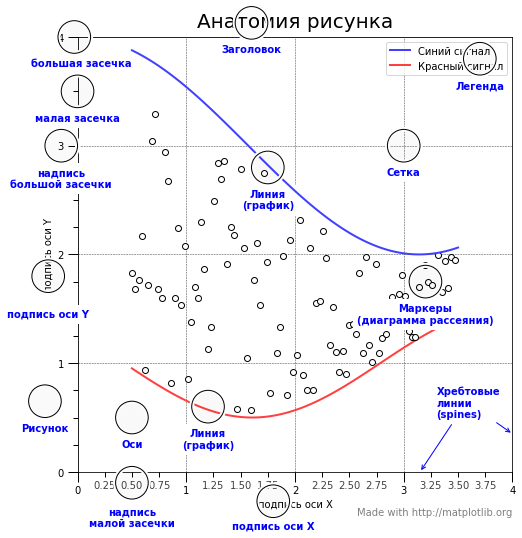

In [13]:
import figure_anatomy

## `subplots`

Создает рисунок и несколько осей, расположенных таблично.

Синтаксис вызова:

`fig, ax = plt.subplots(nrows, ncols, figsize, ...)`

`nrows` - количество строк таблицы

`ncols` - количество столбцов таблицы

`figsize` - размер рисунка в дюймах (кортеж)


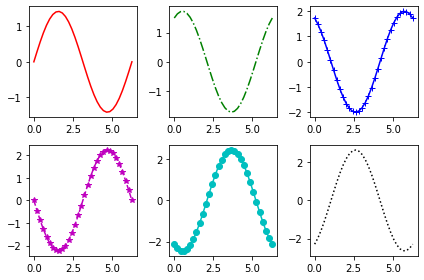

In [21]:
fig, ax = plt.subplots(2, 3, figsize=(6, 4))
x = np.linspace(0, 2*np.pi, 32)
styles = ('-r', '-.g', '-+b', '--*m', '-oc', ':k')

for i, s in enumerate(styles):
    ax[i//3,i%3].plot(x, (i+2)**0.5*np.sin(x + i*np.pi/3), s)

fig.tight_layout()

## Задание

Загрузить изображение по [ссылке](https://www.recticel.com/sites/default/files/newsroom/News_articles/SpaceX_feb_2018/SpaceX%20Heavy%20Tesla.jpg)

Изобразить на одном рисунке **в трех осях** слева-направо: красный, зеленый, синий каналы.

Использовать цветовые карты `'Reds'`, `'Greens'`, `'Blues'` для соответствующих каналов.

## `xlabel`, `ylabel`

Подписи к осям `x` и `y`.

`plt.xlabel(label, ...)` или `ax.set_xlabel(label, ...)` - к оси `x`

`plt.ylabel(label, ...)` или `ax.set_ylabel(label, ...)` - к оси `y`


## `ticks`, `ticklabels`

Засечки на осях позволяют лучше ориентироваться в пространстве, в котором представлен график.

Разместить засечки в соответствии с массивом `ticks`

`plt.xticks(ticks, ...)` или `ax.set_xticks(ticks, ...)` - на оси `x`

`plt.yticks(ticks, ...)` или `ax.set_yticks(ticks, ...)` - на оси `y`

Указать подписи к засечкам в соответствии с массивом `labels`

`plt.xticklabels(labels, ...)` или `ax.set_xticklabels(labels, ...)` - на оси `x`

`plt.yticklabels(labels, ...)` или `ax.set_yticklabels(labels, ...)` - на оси `y`


## `savefig`

Позволяет сохранить график в виде изображения в разных форматах.

Синтаксис вызова:

- `plt.savefig(path, dpi, ...)`
- `fig.savefig(path, dpi, ...)`

`path` - путь к сохраняемому файлу; расширение влияет на формат!

`dpi` - физическое разрешение (точек на дюйм)

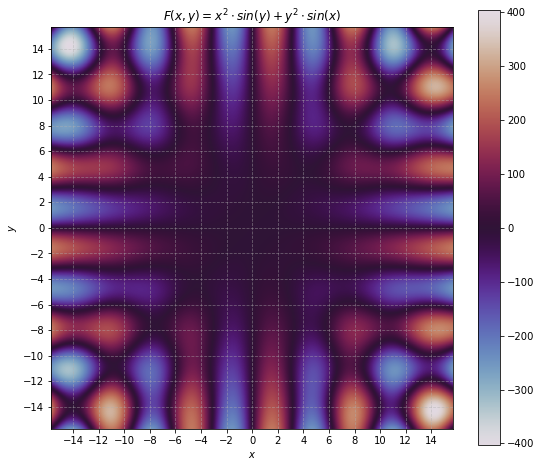

In [15]:
x = np.linspace(-5*np.pi, 5*np.pi,512)
y = x.reshape(-1,1)
z = x**2 * np.sin(y) + y**2 * np.sin(x)

fig, ax = plt.subplots(1, 1, figsize=(9, 8))
im = ax.imshow(z, cmap='twilight', interpolation='bilinear',
               extent=[x.min(), x.max(), y.min(), y.max()])

fig.colorbar(im)
ax.set_xticks(np.arange(-14, 15, 2))
ax.set_yticks(np.arange(-14, 15, 2))
ax.grid(ls='--', alpha=0.5)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_title(r'$F(x, y) = x^2 \cdot sin(y) + y^2 \cdot sin(x)$')

fig.savefig('x2siny_plus_y2sinx.png', dpi=300, bbox_inches='tight');

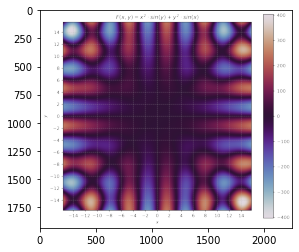

In [16]:
plt.imshow(plt.imread('x2siny_plus_y2sinx.png'))

## Задание

Нарисовать изображение функции $F(x, y) = \frac{1}{1+x^2} + \frac{1}{1+y^2}$

Явно указать засечки

Сделать подписи к осям

Сделать заголовок к рисунку

Отобразить цветовую шкалу

Сохранить изображение в разрешении `200 dpi`